## Model Training

### Importing required libraries 

In [77]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
#modeling
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

### import CSV as Datafreame

In [78]:
df = pd.read_csv('data/stud.csv')

### preparing X and y variables

In [79]:
X = df.drop(columns=['math_score'],axis=1)

In [80]:
y=df['math_score']

In [81]:
X

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95
996,male,group C,high school,free/reduced,none,55,55
997,female,group C,high school,free/reduced,completed,71,65
998,female,group D,some college,standard,completed,78,77


In [82]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [83]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer =StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor =ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,cat_features),
        ("StandardScaler",numeric_transformer,num_features)
    ]
)

In [84]:
X=preprocessor.fit_transform(X)

In [85]:
X.shape


(1000, 19)

In [86]:
# seprate dataset into train and test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [87]:
X_train.shape,X_test.shape

((800, 19), (200, 19))

### Create an Evaluation Function to give all metrics after model training

In [88]:
def evaluate_model(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse =mean_squared_error(true,predicted)
    rmse = np.sqrt(mean_squared_error(true,predicted))
    r2_square = r2_score(true,predicted) 
    return mae, mse, rmse, r2_square

In [89]:
models = {
    "LinearRegression" : LinearRegression(),
    "Lasso" : Lasso(),
    "Ridge" :Ridge(),
    "K-Neighbors Regressor" : KNeighborsRegressor(),
    "Decision Tree" : DecisionTreeRegressor(),
    "Random Forest " : RandomForestRegressor(),
    "AdaBoost Regressor" : AdaBoostRegressor(),
    "XGBoost" :XGBRegressor(),
    "CatBoost Regressor" :CatBoostRegressor()

}
model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list (models.values())[i]
    if isinstance(model, CatBoostRegressor):
        model.fit(X_train, y_train, verbose=False)

    else:
        model.fit(X_train,y_train) #MODEL TRAINING

    # Make Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    #Evaluale train and test data

    model_train_mae, model_train_mse, model_train_rmse, model_train_r2 = evaluate_model(y_train,y_train_pred)

    model_test_mae, model_test_mse, model_test_rmse, model_test_r2 = evaluate_model(y_test,y_test_pred)

    print(i)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performace of training set')
    print("- Root mean square error: {:.4f}".format(model_train_rmse))
    print("- Mean square error: {:.4f}".format(model_train_mse))
    print("- Mean absolute error: {:.4f}".format(model_train_mae))
    print("- R2score: {:.4f}".format(model_train_r2))

    print('--------------------------------------')

    print('Model performace of training set')
    print("- Root mean square error: {:.4f}".format(model_test_rmse))
    print("- Mean square error: {:.4f}".format(model_test_mse))
    print("- Mean absolute error: {:.4f}".format(model_test_mae))
    print("- R2score: {:.4f}".format(model_test_r2))

    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')




0
LinearRegression
Model performace of training set
- Root mean square error: 5.3231
- Mean square error: 28.3349
- Mean absolute error: 4.2667
- R2score: 0.8743
--------------------------------------
Model performace of training set
- Root mean square error: 5.3940
- Mean square error: 29.0952
- Mean absolute error: 4.2148
- R2score: 0.8804


1
Lasso
Model performace of training set
- Root mean square error: 6.5938
- Mean square error: 43.4784
- Mean absolute error: 5.2063
- R2score: 0.8071
--------------------------------------
Model performace of training set
- Root mean square error: 6.5197
- Mean square error: 42.5064
- Mean absolute error: 5.1579
- R2score: 0.8253


2
Ridge
Model performace of training set
- Root mean square error: 5.3233
- Mean square error: 28.3378
- Mean absolute error: 4.2650
- R2score: 0.8743
--------------------------------------
Model performace of training set
- Root mean square error: 5.3904
- Mean square error: 29.0563
- Mean absolute error: 4.2111
- R2

5
Random Forest 
Model performace of training set
- Root mean square error: 2.2878
- Mean square error: 5.2340
- Mean absolute error: 1.8208
- R2score: 0.9768
--------------------------------------
Model performace of training set
- Root mean square error: 5.9875
- Mean square error: 35.8500
- Mean absolute error: 4.6645
- R2score: 0.8527


6
AdaBoost Regressor
Model performace of training set
- Root mean square error: 5.7487
- Mean square error: 33.0480
- Mean absolute error: 4.7171
- R2score: 0.8534
--------------------------------------
Model performace of training set
- Root mean square error: 6.0010
- Mean square error: 36.0115
- Mean absolute error: 4.6491
- R2score: 0.8520


7
XGBoost
Model performace of training set
- Root mean square error: 1.0073
- Mean square error: 1.0146
- Mean absolute error: 0.6875
- R2score: 0.9955
--------------------------------------
Model performace of training set
- Root mean square error: 6.4733
- Mean square error: 41.9037
- Mean absolute error: 

## Results

In [90]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name', 'R2_score']).sort_values(by=['R2_score'],ascending=False)


,Model Name,R2_score
2,Ridge,0.880593
0,LinearRegression,0.880433
5,Random Forest,0.852674
6,AdaBoost Regressor,0.852010
8,CatBoost Regressor,0.851632
7,XGBoost,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783813
4,Decision Tree,0.741820


In [91]:

lin_model = LinearRegression()

lin_model.fit(X_train, y_train)
y_test_pred = lin_model.predict(X_test)
score =r2_score(y_test,y_test_pred)* 100
print("Accuracy of the model is {:.2f}".format(score))


Accuracy of the model is 88.04


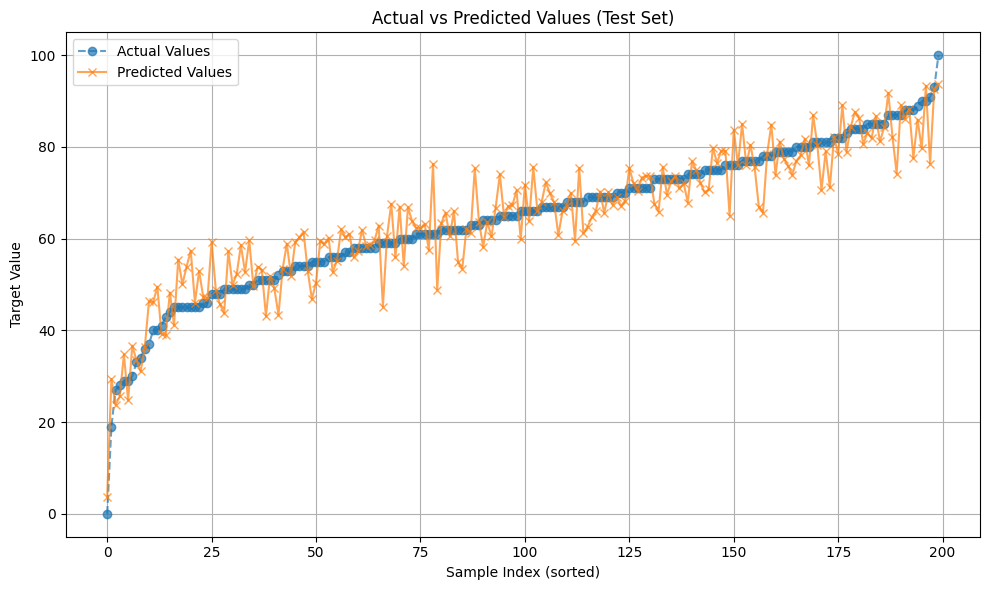

In [92]:

sorted_indices = y_test.argsort()
y_test_sorted = y_test.iloc[sorted_indices]
y_pred_sorted = y_test_pred[sorted_indices]

plt.figure(figsize=(10, 6))
plt.plot(y_test_sorted.values, label='Actual Values', marker='o', linestyle='--', alpha=0.7)
plt.plot(y_pred_sorted, label='Predicted Values', marker='x', linestyle='-', alpha=0.7)

plt.title('Actual vs Predicted Values (Test Set)')
plt.xlabel('Sample Index (sorted)')
plt.ylabel('Target Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
